Trabajo Analítica predictiva
===
** Pedro Turriago Sanchez **  
pturriago@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  
Url github: https://github.com/petusan36/TrabajoAnaliticaPredictiva/blob/master/Data%20Bank%20Marketing%20Data%20Set%20-%20An%C3%A1lisis%20Python.ipynb

Definición del problema real
====
---
Los datos están relacionados con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requirió más de un contacto para el mismo cliente, para conocer si el producto (depósito a plazo bancario) estaría suscrito ('sí') o no ('no').

---
El objetivo de la clasificación es predecir si el cliente suscribirá (sí / no) un depósito a plazo (variable y).


Información de atributos
==

## Variables de entrada:


### Datos del cliente:
1. Age: edad, (numérico)
2. job : trabajo,  tipo de trabajo (categórico: 'admin.', 'Trabajador', 'empresario', 'empleada doméstica', 'gerente', 'jubilado', 'autónomo', 'servicios', 'estudiante' , 'técnico', 'desempleado', 'desconocido')
3. marital: estado civil (categórico: "divorciado", "casado", "soltero", "desconocido"; nota: "divorciado" significa divorciado o viudo)
4. education : educación (categórica: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'analfabeto', 'professional.course', 'university.degree', 'unknown')
5. default; predeterminado, ¿tiene crédito en defecto? (categórico: 'no', 'sí', 'unknown')
6. housing: vivienda, ¿tiene préstamo de vivienda? (categórico: 'no', 'sí', 'unknown')
7. loan: préstamo, tiene préstamo personal? (categórico: 'no', 'sí', 'unknown')

#### relacionado con el último contacto de la campaña actual:

8. contact: contacto, tipo de comunicación de contacto (categórico: 'celular', 'teléfono')
9. month: mes, último mes del año del contacto (categórico: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: día de la semana,  último día de contacto de la semana (categórico: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: duración, duración del último contacto, en segundos (numérico). 

*** Nota importante: *** este atributo afecta en gran medida al objetivo de salida (por ejemplo, si la duración = 0, entonces y = 'no'). Sin embargo, la duración no se conoce antes de que se realice una llamada. Además, después del final de la llamada y es obviamente conocido. Por lo tanto, esta información solo debe incluirse para fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.

#### otros atributos:
12. campaign: campaña, número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
13. pdays: días, número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente)
14. previous: anterior, número de contactos realizados antes de esta campaña y para este cliente (numérico)
15. poutcome: resultado de la campaña de marketing anterior (categórica: 'fracaso', 'inexistente', 'éxito')

#### atributos del contexto social y económico
16. emp.var.rate: tasa de variación del empleo - indicador trimestral (numérico)
17. cons.price.idx: índice de precios al consumidor - indicador mensual (numérico)
18. cons.conf.idx: índice de confianza del consumidor - indicador mensual (numérico)
19. euribor3m: euribor tasa de 3 meses - indicador diario (numérico)
20. nr.employed: número de empleados - indicador trimestral (numérico)

#### Variable de salida (objetivo deseado):
21. y: ¿El cliente ha suscrito un depósito a plazo? (binario: 'sí', 'no')

*** Nota: *** se va a usar la variable "y" para realizar los grupos de clasificación

Fase de exploración y limpieza de la información
====

#### Importación de las librerias

In [1]:
# import sklearn
from scipy.stats import mode
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
# from scipy.stats import mode
# from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_similarity_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

#### Definición de funciones

In [2]:
# Factorizar
def factor(dataset,full=0):
    enc = LabelEncoder()
    labels=dataset._get_numeric_data().columns
    for n in range(len(dataset.columns)):
        if df.columns[n] not in labels:
            dataset[dataset.columns[n]] = enc.fit_transform(dataset[dataset.columns[n]])
        if full== 1:
            dataset[dataset.columns[n]] = enc.fit_transform(dataset[dataset.columns[n]])
    return(dataset)

#Estilo correlación
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "8pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

# mapa de correlación
def correl(correlacion):
    cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
    return (correlacion.style.background_gradient(cmap, axis=1)\
        .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
        .set_caption("Estilo tabla")\
        .set_precision(2)\
        .set_table_styles(magnify()))

# Función para buscar valores y remplazar por otros, se hace para cambiar a nulos valores como los uknonw
def nulos(dataset, valini="",valfin=""):
    new=dataset.copy()
    for n in range(len(dataset.columns)):
#         dataset[dataset.columns[n]] = enc.fit_transform(dataset[dataset.columns[n]])
        if valfin == "Nulos":
            new[dataset.columns[n]]=dataset[dataset.columns[n]].replace([valini],np.NaN)
        else:
            new[dataset.columns[n]]=dataset[dataset.columns[n]].replace([valini],valfin)
    return(new)

# función OneR
class OneR:
    
    def __init__(self):
        self.clf = None
    
    def fit(self, x, y):
        self.clf = list()
        names = ["var" + str(i) for i in range(len(x[0]))]
        df = pd.DataFrame(data = x, columns = names, index = y)
        df.index.name = "type"
        for col in df.columns:
            va0 = df.groupby(["type",col]).agg("count")
            va0.index.names[0]
            df1 = va0.reset_index()
            dc = dict()
            for i in df1.values:
                k = i[1]
                t0 = i[0]
                v0 = i[2]
                if dc.get(k) == None:
                    dc[k] = (t0, v0)
                else:
                    (t, v) = dc.get(k)
                    if v < v0:
                        dc[k] = (t0, v0)
            dc2 = dict()
            for k in dc.keys():
                (t, v) = dc.get(k)
                dc2[k] = t
            
            self.clf.append(dc2)
            
        yp = self.predict(x)
        t1 = [(yp_val,yr_val) for yp_val, yr_val in zip(yp,y)]
        t2 = [0 for i in range(len(t1[0]))]
        for (v1, v2) in t1:
            for k in range(len(v1)):
                if v1[k] == v2:
                    t2[k] = t2[k] + 1
                    
        max_index = t2.index(max(t2))      
        return(self.clf[max_index])
        
    def predict(self, x):
        p = list()
        for k in x:
            pc = list()
            for i,j in enumerate(k):
                pc.append(self.clf[i].get(j))
            p.append(pc)
        return(p)
    
    def __repr__(self):
        return self.clf.__repr__()

#### Importación de los datos

In [3]:
df = pd.read_csv('DBM_Data/bank_af.csv', delimiter=";")
df_limpiar = df.copy()
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Análisis exploratorio

* se observan variables de diferentes tipos

In [4]:
tot_var=len(df.columns)
num_var=len(df._get_numeric_data().columns)
print(df.dtypes, "\n\nTotal de variables", tot_var, "\nNuméricas", num_var, "\nObjetos", tot_var-num_var, "\nTotal de registros", len(df))

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object 

Total de variables 21 
Numéricas 10 
Objetos 11 
Total de registros 41188


* Se hace descripción de los datos actuales y se observan desviaciones altas en algunas de las variables.
* De las 22 variables, incialmente se pueden describir solamente 10 que son las numéricas(cuantitativas).

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Espacio para hacer OneR

* Se aplican conversiones de los datos tipo objeto a tipo numéricos, respetando los datos númericos de las demás variables y se verifican nuevamente los tipos de datos

In [7]:
df=factor(df)
tot_var=len(df.columns)
num_var=len(df._get_numeric_data().columns)
print(df.dtypes, "\n\nTotal de variables", tot_var, "\nNuméricas", num_var, "\nObjetos", tot_var-num_var, "\nTotal de registros", len(df))

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object 

Total de variables 21 
Numéricas 21 
Objetos 0 
Total de registros 41188


* Se observan nuevamente los datos se observan desviaciones altas en algunas de las variables.
* Ya se pueden observar las 22 variables del dataset

In [8]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [9]:
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,...,2.567593,962.475454,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,...,2.770014,186.910907,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,...,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,...,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,...,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


* Hacemos una exploración visual de la información usando gráficos de densidad

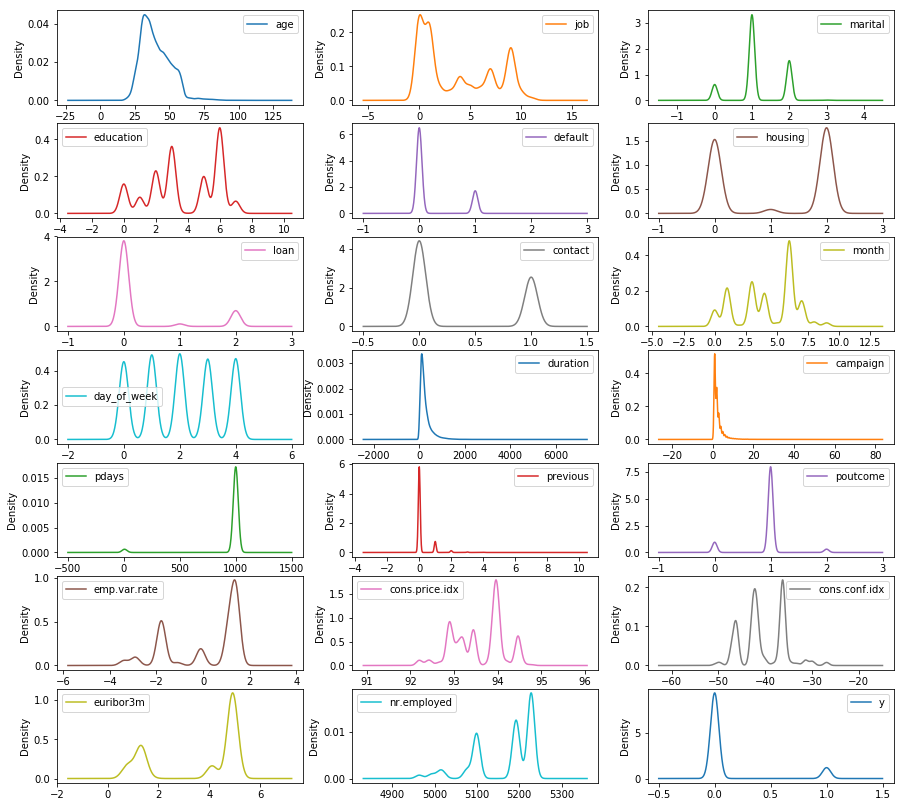

In [10]:
df.plot(kind='density', subplots=True, layout=(17,3), sharex=False, figsize=(15,35))
plt.show()

* Los datos contienen información que debe ser depurada. Dentro del set de datos contiene valores "unknown" y "999" que no son validos para el análisis ya que no están asociados a los valores reales que se pueden encontrar dentro de la variable. Para esto se debe decidir si se completan los datos o se omiten para la exploración y creación del modelo.

In [11]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

* Como se hizo una transformación, los datos "Unknwon" fueron vueltos numeros y se representaron como un número, pero para esta exploración es importante que cantidad de nulos existen; por esto se debe hacer una limpieza de estos valores anter de volverlos factor

In [12]:
# df_limpiar = df.copy()
df_limpiar= nulos(df_limpiar,'unknown','Nulos')
df_limpiar= nulos(df_limpiar,999,'Nulos')
# df_limpiar=factor(df_limpiar)
# tot_var=len(df_limpiar.columns)
# num_var=len(df_limpiar._get_numeric_data().columns)
# print(df_limpiar.dtypes, "\n\nTotal de variables", tot_var, "\nNuméricas", num_var, "\nObjetos", tot_var-num_var, "\nTotal de registros", len(df_limpiar))

* Se observa que existe una variable (pdays, education) que no aporta valor para el análisis

In [13]:
print("Nulos\n___________\n",df_limpiar.isnull().sum(), "\n\nNo nulos\n___________\n",df_limpiar.count())

Nulos
___________
 age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              2
campaign              0
pdays             39673
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64 

No nulos
___________
 age               41188
job               40858
marital           41108
education         39457
default           32591
housing           40198
loan              40198
contact           41188
month             41188
day_of_week       41188
duration          41186
campaign          41188
pdays              1515
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3

* los datos quedan de la siguiente manera

In [14]:
df_limpiar=df_limpiar.drop(['pdays','education', 'duration'], axis=1)
print("Nulos\n___________\n",df_limpiar.isnull().sum(), "\n\nNo nulos\n___________\n",df_limpiar.count())

Nulos
___________
 age                  0
job                330
marital             80
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64 

No nulos
___________
 age               41188
job               40858
marital           41108
default           32591
housing           40198
loan              40198
contact           41188
month             41188
day_of_week       41188
campaign          41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64


* Para los demás datos se aplican factores

In [15]:
df_limpiar= nulos(df_limpiar,np.NaN,'unknwon')
df_limpiar=factor(df_limpiar,1)
# df_limpiar.head(10)
df_limpiar.describe()

,age,job,marital,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,23.023623,3.72458,1.172769,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,1.566840,0.172963,0.930101,6.588521,14.196489,10.335656,255.634821,7.845829,0.112654
std,10.418993,3.59456,0.608902,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,2.758711,0.494901,0.362886,2.797902,5.560136,5.978930,68.665954,2.454812,0.316173
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,3.000000,10.000000,6.000000,214.000000,6.000000,0.000000
50%,21.000000,2.00000,1.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000,1.000000,8.000000,14.000000,8.000000,287.000000,8.000000,0.000000
75%,30.000000,7.00000,2.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,2.000000,0.000000,1.000000,9.000000,18.000000,16.000000,305.000000,10.000000,0.000000
max,77.000000,11.00000,3.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,41.000000,7.000000,2.000000,9.000000,25.000000,25.000000,315.000000,10.000000,1.000000


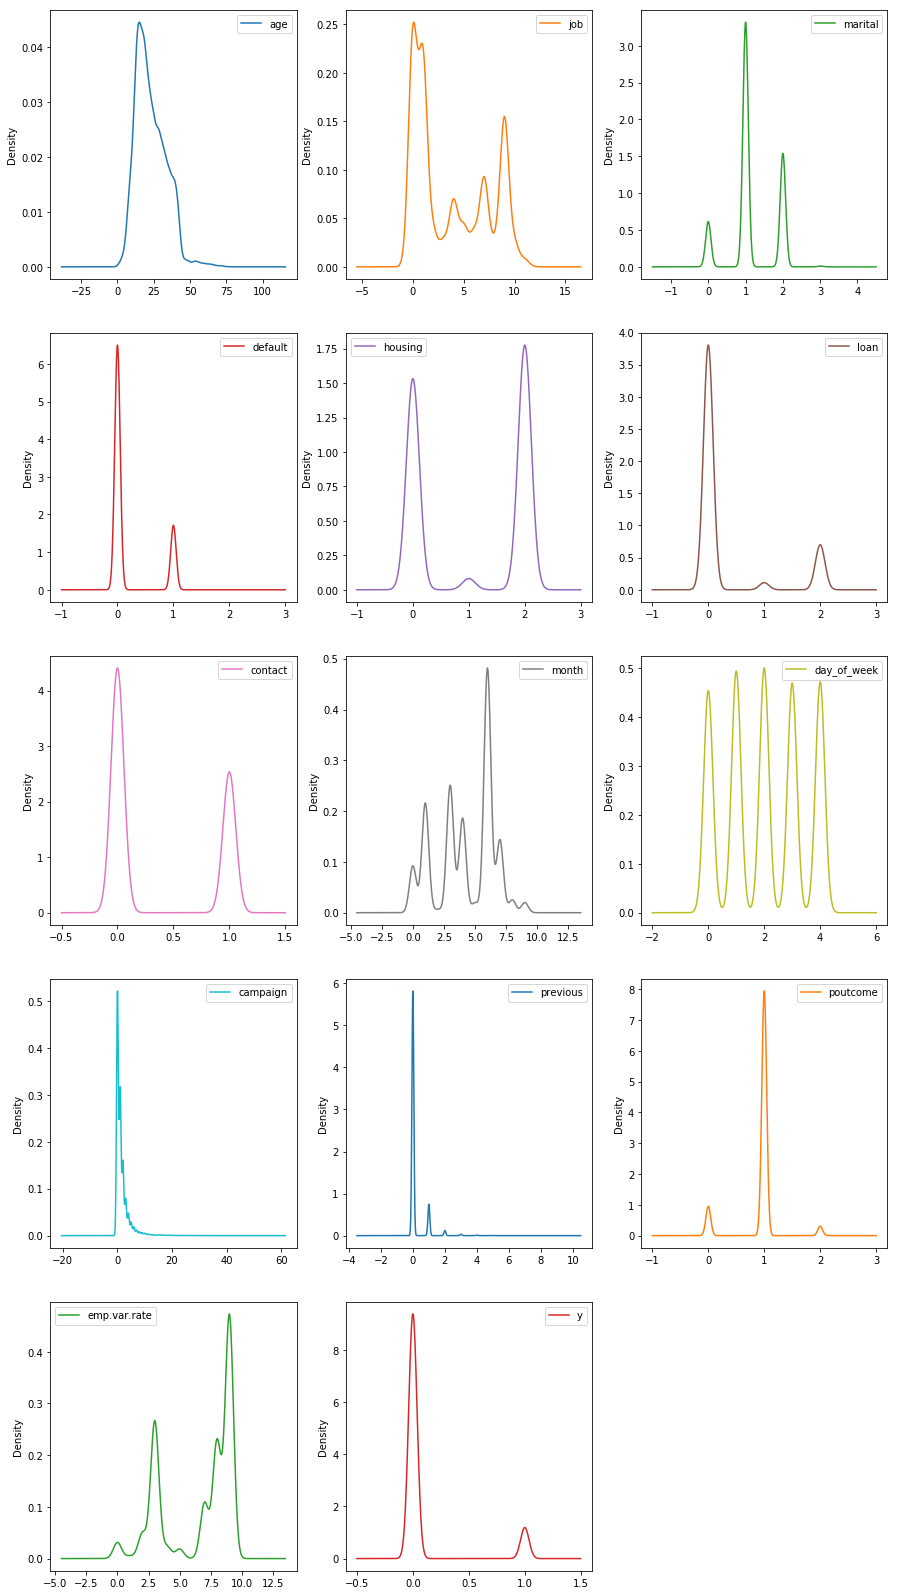

In [39]:
df_limpiar.plot(kind='density', subplots=True, layout=(17,3), sharex=False, figsize=(15,35))
plt.show()

* Veo que tan dispersos están mis datos

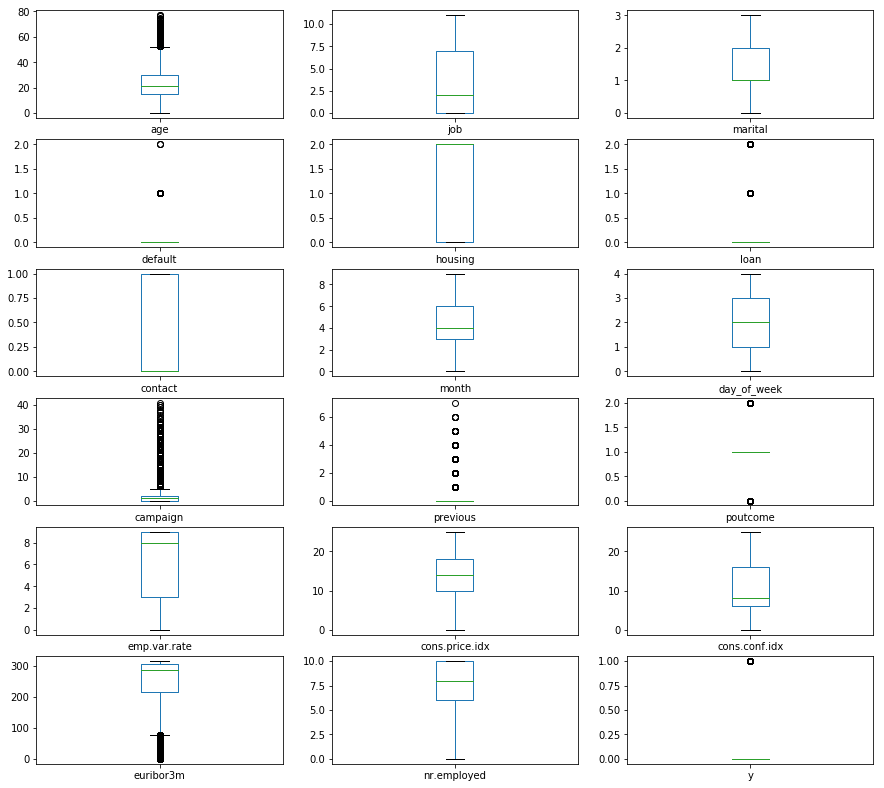

In [17]:
df_limpiar.plot(kind='box', subplots=True, layout=(17,3), sharex=False, sharey=False, figsize=(15,40))
plt.show()

In [18]:
correlations = df_limpiar.corr()
correl(correlations)

,age,job,marital,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1,0.0012,-0.39,0.16,-0.0016,-0.0074,0.0071,-0.025,-0.018,0.0047,0.024,0.02,0.0023,-0.0061,0.13,-0.048,-0.026,0.03
job,0.0012,1,0.028,-0.028,0.007,-0.01,-0.025,-0.033,-0.00084,-0.0068,0.021,0.012,-0.0036,-0.017,0.057,-0.025,-0.022,0.025
marital,-0.39,0.028,1,-0.079,0.01,0.0058,-0.055,-0.0076,0.0022,-0.0073,0.039,0.0019,-0.082,-0.056,-0.028,-0.079,-0.08,0.046
default,0.16,-0.028,-0.079,1,-0.016,-0.0038,0.14,-0.016,-0.0087,0.033,-0.1,0.023,0.19,0.17,0.02,0.19,0.18,-0.099
housing,-0.0016,0.007,0.01,-0.016,1,0.044,-0.082,-0.018,0.0033,-0.011,0.021,-0.012,-0.056,-0.079,-0.029,-0.041,-0.036,0.012
loan,-0.0074,-0.01,0.0058,-0.0038,0.044,1,-0.0086,-0.0057,-0.0093,0.005,-0.0013,-0.0015,0.0013,-0.002,-0.012,0.0051,0.0055,-0.0049
contact,0.0071,-0.025,-0.055,0.14,-0.082,-0.0086,1,0.28,-0.0096,0.077,-0.21,0.12,0.35,0.58,0.24,0.27,0.18,-0.14
month,-0.025,-0.033,-0.0076,-0.016,-0.018,-0.0057,0.28,1,0.028,-0.062,0.1,-0.065,-0.19,-0.0064,-0.019,-0.2,-0.27,-0.0061
day_of_week,-0.018,-0.00084,0.0022,-0.0087,0.0033,-0.0093,-0.0096,0.028,1,-0.038,-0.0041,0.019,0.036,0.0022,0.035,0.023,0.023,0.016
campaign,0.0047,-0.0068,-0.0073,0.033,-0.011,0.005,0.077,-0.062,-0.038,1,-0.079,0.033,0.15,0.13,-0.024,0.13,0.14,-0.067


* De la matriz de correlación se puede observar que hay otras variables que no aportan valor para el análisis, se escogen una de las fuertemente correlacionadas y se eliminan: euribor3m, nr.employed, cons.conf.idx, cons.price.idx; además en la explicación del tipo de variables se nota que esta información de las variables generan ruido con respecto a las varibles propias de la campaña

In [19]:
df_limpiar=df_limpiar.drop(['euribor3m','nr.employed', 'cons.conf.idx','cons.price.idx'], axis=1)
correlations = df_limpiar.corr()
correl(correlations)

,age,job,marital,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,y
age,1,0.0012,-0.39,0.16,-0.0016,-0.0074,0.0071,-0.025,-0.018,0.0047,0.024,0.02,0.0023,0.03
job,0.0012,1,0.028,-0.028,0.007,-0.01,-0.025,-0.033,-0.00084,-0.0068,0.021,0.012,-0.0036,0.025
marital,-0.39,0.028,1,-0.079,0.01,0.0058,-0.055,-0.0076,0.0022,-0.0073,0.039,0.0019,-0.082,0.046
default,0.16,-0.028,-0.079,1,-0.016,-0.0038,0.14,-0.016,-0.0087,0.033,-0.1,0.023,0.19,-0.099
housing,-0.0016,0.007,0.01,-0.016,1,0.044,-0.082,-0.018,0.0033,-0.011,0.021,-0.012,-0.056,0.012
loan,-0.0074,-0.01,0.0058,-0.0038,0.044,1,-0.0086,-0.0057,-0.0093,0.005,-0.0013,-0.0015,0.0013,-0.0049
contact,0.0071,-0.025,-0.055,0.14,-0.082,-0.0086,1,0.28,-0.0096,0.077,-0.21,0.12,0.35,-0.14
month,-0.025,-0.033,-0.0076,-0.016,-0.018,-0.0057,0.28,1,0.028,-0.062,0.1,-0.065,-0.19,-0.0061
day_of_week,-0.018,-0.00084,0.0022,-0.0087,0.0033,-0.0093,-0.0096,0.028,1,-0.038,-0.0041,0.019,0.036,0.016
campaign,0.0047,-0.0068,-0.0073,0.033,-0.011,0.005,0.077,-0.062,-0.038,1,-0.079,0.033,0.15,-0.067


* Se aplica escalado a los datos

In [20]:
variables = df_limpiar.columns[:-1]
datos = df_limpiar.loc[:, variables].values
target = df_limpiar.loc[:,['y']].values

# datos = StandardScaler().fit_transform(datos)
scaler = MinMaxScaler()
datos = scaler.fit_transform(datos)
# datos = StandardScaler().fit_transform(datos)
print(pd.DataFrame(datos))

             0         1         2    3    4    5    6         7     8   \
0      0.506494  0.272727  0.333333  0.0  0.0  0.0  1.0  0.666667  0.25   
1      0.519481  0.636364  0.333333  0.5  0.0  0.0  1.0  0.666667  0.25   
2      0.259740  0.636364  0.333333  0.0  1.0  0.0  1.0  0.666667  0.25   
3      0.298701  0.000000  0.333333  0.0  0.0  0.0  1.0  0.666667  0.25   
4      0.506494  0.636364  0.333333  0.0  0.0  1.0  1.0  0.666667  0.25   
5      0.363636  0.636364  0.333333  0.5  0.0  0.0  1.0  0.666667  0.25   
6      0.545455  0.000000  0.333333  0.0  0.0  0.0  1.0  0.666667  0.25   
7      0.311688  0.090909  0.333333  0.5  0.0  0.0  1.0  0.666667  0.25   
8      0.090909  0.818182  0.666667  0.0  1.0  0.0  1.0  0.666667  0.25   
9      0.103896  0.636364  0.666667  0.0  1.0  0.0  1.0  0.666667  0.25   
10     0.311688  0.090909  0.333333  0.5  0.0  0.0  1.0  0.666667  0.25   
11     0.103896  0.636364  0.666667  0.0  1.0  0.0  1.0  0.666667  0.25   
12     0.155844  0.090909

In [21]:
datos_escalados=pd.DataFrame(datos, columns=variables)
datos_escalados.describe()

,age,job,marital,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.299008,0.338598,0.390923,0.104436,0.535860,0.163713,0.365252,0.470096,0.501153,0.038216,0.024709,0.465051,0.732058
std,0.135312,0.326778,0.202967,0.203343,0.492657,0.361808,0.481507,0.257781,0.349394,0.067286,0.070700,0.181443,0.310878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.250000,0.000000,0.000000,0.500000,0.333333
50%,0.272727,0.181818,0.333333,0.000000,1.000000,0.000000,0.000000,0.444444,0.500000,0.024390,0.000000,0.500000,0.888889
75%,0.389610,0.636364,0.666667,0.000000,1.000000,0.000000,1.000000,0.666667,0.750000,0.048780,0.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
correlations = datos_escalados.corr()
correl(correlations)

,age,job,marital,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate
age,1,0.0012,-0.39,0.16,-0.0016,-0.0074,0.0071,-0.025,-0.018,0.0047,0.024,0.02,0.0023
job,0.0012,1,0.028,-0.028,0.007,-0.01,-0.025,-0.033,-0.00084,-0.0068,0.021,0.012,-0.0036
marital,-0.39,0.028,1,-0.079,0.01,0.0058,-0.055,-0.0076,0.0022,-0.0073,0.039,0.0019,-0.082
default,0.16,-0.028,-0.079,1,-0.016,-0.0038,0.14,-0.016,-0.0087,0.033,-0.1,0.023,0.19
housing,-0.0016,0.007,0.01,-0.016,1,0.044,-0.082,-0.018,0.0033,-0.011,0.021,-0.012,-0.056
loan,-0.0074,-0.01,0.0058,-0.0038,0.044,1,-0.0086,-0.0057,-0.0093,0.005,-0.0013,-0.0015,0.0013
contact,0.0071,-0.025,-0.055,0.14,-0.082,-0.0086,1,0.28,-0.0096,0.077,-0.21,0.12,0.35
month,-0.025,-0.033,-0.0076,-0.016,-0.018,-0.0057,0.28,1,0.028,-0.062,0.1,-0.065,-0.19
day_of_week,-0.018,-0.00084,0.0022,-0.0087,0.0033,-0.0093,-0.0096,0.028,1,-0.038,-0.0041,0.019,0.036
campaign,0.0047,-0.0068,-0.0073,0.033,-0.011,0.005,0.077,-0.062,-0.038,1,-0.079,0.033,0.15


* Se obtienen componentes principales por medio de la técnica de PCA, los cuales serviran para el modelo

In [23]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(datos_escalados)
principalComponents.shape

(41188, 13)

In [24]:
print(pd.DataFrame(principalComponents))

             0         1         2         3         4         5         6   \
0      0.861984 -0.042548 -0.089792 -0.270776 -0.071766  0.078408  0.055318   
1      0.883350 -0.025862 -0.107955 -0.273737  0.283672  0.094594  0.292151   
2      0.259994  0.754212 -0.176104 -0.284398  0.278080  0.151143 -0.005602   
3      0.868035 -0.038971 -0.075462 -0.266417 -0.336399  0.019884 -0.023254   
4      0.811813  0.008751  0.877997 -0.136227  0.324987  0.198374  0.078258   
5      0.882779 -0.026221 -0.107607 -0.272472  0.283527  0.098230  0.242534   
6      0.868939 -0.038404 -0.076012 -0.268420 -0.336169  0.014128  0.055307   
7      0.896213 -0.018231 -0.079758 -0.266705 -0.245400 -0.027300  0.201163   
8      0.245775  0.745343 -0.184106 -0.285073  0.458963  0.219148 -0.293292   
9      0.250365  0.748076 -0.174890 -0.283397  0.282682  0.176598 -0.297435   
10     0.896213 -0.018231 -0.079758 -0.266705 -0.245400 -0.027300  0.201163   
11     0.250365  0.748076 -0.174890 -0.283397  0.282

In [25]:
pca.explained_variance_ratio_

array([0.23884405, 0.19939157, 0.11449063, 0.10727982, 0.09394277,
       0.08703231, 0.04174755, 0.03797675, 0.03289967, 0.02733706,
       0.01188404, 0.00386426, 0.00330952])

* La gráfica indica que con 9 componentes que se apliquen a modelo podemos obtener aprox el 100% del análisis de la información; si ya se aplican más componentes, estos no me generarán valor al modelo

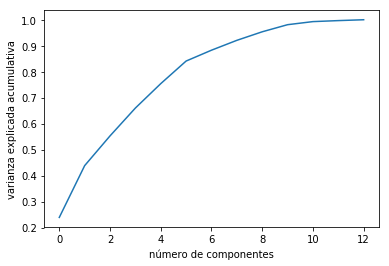

In [26]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('varianza explicada acumulativa');

In [27]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(datos_escalados)
principalComponents.shape

(41188, 9)

* Se completa el dataset para aplicar al modelo

In [28]:
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, df_limpiar[['y']]], axis = 1)
finalDf.describe()

,0,1,2,3,4,5,6,7,8,y
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,41188.000000
mean,-1.021503e-15,9.280678e-17,2.516722e-17,-1.849141e-16,-4.563576e-17,-3.391008e-16,1.888738e-17,2.579905e-16,3.770669e-18,0.112654
std,5.219718e-01,4.769174e-01,3.613889e-01,3.498234e-01,3.273569e-01,3.150867e-01,2.182254e-01,2.081367e-01,1.937250e-01,0.316173
min,-8.119874e-01,-8.063119e-01,-3.092241e-01,-6.305475e-01,-5.796532e-01,-6.890015e-01,-7.222385e-01,-6.140003e-01,-3.705031e-01,0.000000
25%,-5.089221e-01,-5.759804e-01,-1.923755e-01,-2.848483e-01,-2.642719e-01,-2.454770e-01,-1.479417e-01,-1.203210e-01,-1.476720e-01,0.000000
50%,5.114474e-02,5.218825e-02,-1.437144e-01,-1.524419e-02,-1.285949e-01,2.200494e-02,-4.692531e-03,-1.595307e-02,-3.260518e-02,0.000000
75%,2.757714e-01,1.971493e-01,-7.277816e-02,2.645402e-01,3.009175e-01,2.240253e-01,1.671780e-01,8.728070e-02,1.163165e-01,0.000000
max,9.152262e-01,8.516867e-01,9.571962e-01,6.594244e-01,7.873918e-01,1.124693e+00,8.377426e-01,9.575137e-01,7.899097e-01,1.000000


* Validamos la correlación nuevamente

In [29]:
correlations = finalDf.corr()
correl(correlations)

,0,1,2,3,4,5,6,7,8,y
0,1,-8.1e-16,5.7e-16,-2.2e-16,-3.1e-16,6.3e-16,2.1e-16,-5.2e-16,-1.7e-16,-0.15
1,-8.1e-16,1,-1e-16,2.7e-16,-3.4e-17,5.5e-16,-1.1e-16,4.1e-16,8.7e-17,-0.11
2,5.7e-16,-1e-16,1,2.5e-16,-4.6e-16,-4.2e-16,2.2e-16,-1e-16,3.7e-16,-0.011
3,-2.2e-16,2.7e-16,2.5e-16,1,3.4e-17,4.6e-16,3.7e-16,1.8e-16,7e-17,-0.0028
4,-3.1e-16,-3.4e-17,-4.6e-16,3.4e-17,1,-3.6e-16,-1.6e-16,3.1e-16,1.4e-16,-0.021
5,6.3e-16,5.5e-16,-4.2e-16,4.6e-16,-3.6e-16,1,-3.5e-16,7e-16,-1.1e-16,0.18
6,2.1e-16,-1.1e-16,2.2e-16,3.7e-16,-1.6e-16,-3.5e-16,1,9.4e-16,1.1e-16,-0.071
7,-5.2e-16,4.1e-16,-1e-16,1.8e-16,3.1e-16,7e-16,9.4e-16,1,-4.9e-16,0.11
8,-1.7e-16,8.7e-17,3.7e-16,7e-17,1.4e-16,-1.1e-16,1.1e-16,-4.9e-16,1,-0.019
y,-0.15,-0.11,-0.011,-0.0028,-0.021,0.18,-0.071,0.11,-0.019,1


#### Modelamiento

* Se divide el dataset en partes de entrenamiento y prueba

In [30]:
x_train, x_test, y_train, y_test = train_test_split( finalDf,target, test_size=0.2)

1. **** Regresión logística ****

Se aplica el solver **lbfgs** el cual es mucho más eficiente y veloz

In [31]:
lr = LogisticRegression(solver = 'lbfgs', max_iter=100)
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

* Evaluamos la precisión del algoritmo

In [32]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

* Se observa que el modelo está respondiendo en un 100% con la información que se le envía, por lo cual es mejor replantear el uso de los datos

In [33]:
print("Score:",lr.score(x_test,y_test))
print("accuracy_score:",accuracy_score(y_true = y_test, y_pred = y_pred))
print("jaccard_similarity_score",jaccard_similarity_score(y_true=y_test, y_pred=y_pred))
print(print("\n\nclassification_report\n---------------------\n",classification_report(y_true=y_test, y_pred=y_pred)))

Score: 1.0
accuracy_score: 1.0
jaccard_similarity_score 1.0


classification_report
---------------------
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      7283
          1       1.00      1.00      1.00       955

avg / total       1.00      1.00      1.00      8238

None


* Creamos y graficamos la matriz de confusión

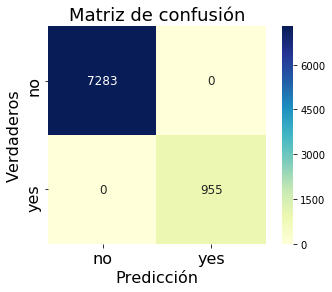

In [34]:
lr_cm = confusion_matrix(y_test, y_pred)
print('\n')
ax= plt.subplot()
sns.heatmap(lr_cm, annot=True, ax = ax,square=True, cmap="YlGnBu", annot_kws={"size":12}, fmt="d");
ax.set_xlabel('Predicción' , fontsize='16');
ax.set_ylabel('Verdaderos' , fontsize='16'); 
ax.set_title('Matriz de confusión', fontsize='18'); 
ax.xaxis.set_ticklabels(['no', 'yes'], fontsize='16'); 
ax.yaxis.set_ticklabels(['no', 'yes'], fontsize='16');

* Validamos el target para serciorarnos el % de la precisión mostrada en el modelo
* Se observa un peso elevado en una de las categorias del target y con las observaciones anteriores de media, se ven que están claramente definidos los grupos de las clases

In [35]:
category_y=pd.Categorical(finalDf.y)
c=category_y.describe()
c=c.reset_index()
c.categories=c.categories.replace([0],'No')
c.categories=c.categories.replace([1],'Yes')

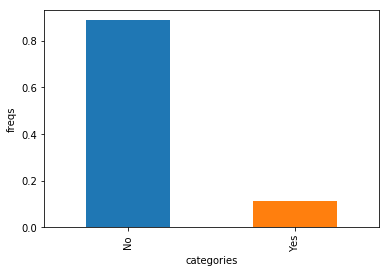

In [36]:
c.plot(x='categories', y='freqs', kind="bar", legend =False)
plt.ylabel("freqs")
plt.show()

In [37]:
# # crea los set de entrenamientos
# train, test = train_test_split(finalDf, train_size=0.5, random_state=88)
# qualityTrain = pd.DataFrame(train, columns=finalDf.columns)
# qualityTest = pd.DataFrame(test, columns=finalDf.columns)

2.**** Knn ****

Se realiza el análisis con el modelo de knn

In [38]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)

NameError: name 'X_train' is not defined